# Assignment Machine Learning By Aman Kumar

### About the Dataset

The dataset was developed by starting with satellite images of the ocean,some of which contain an oilspill and some that do not.Images were split into sections and processed using computer vision algorithms to provide a vector of features to describe the contents of the image section or patch. The task is,given a vector that describes the contents of a patch of a satellite image,then predicts whether the patch contains an oil spill or not,e.g.from the illegal or accidental dumping of oil in the ocean.There are two classes and the goal is to distinguish between spill and non-spill using the features for a given ocean patch.

● Non-Spill : negative case, or majority class.

● Oil Spill : positive case, or minority class.

There are a total of 50 Columns in the Dataset , the output column is named as target.


### Things to do in this Assignment

●Download the Oil Spill Dataset and perform Data cleaning and Data Pre-Processing if Necessary.

●Use the various methods such as Handling nullvalues , One-HotEncoding, Imputation and Scaling of Data Pre-Processing where necessary.

●Derive some insights from the dataset.

●Apply various Machine Learning techniques to predict the output in target column, make use of Bagging and Ensemble as required and find the best model by evaluating the model using Model evaluation techniques.

●Save the best model and Load the model

●Take the original dataset and make another dataset by randomly picking 20 datapoints from the oil spill dataset and apply the saved model on the same.


#### Importing Basic Libraries

In [187]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

#### Read the Dataset

In [212]:
df=pd.read_csv('oil_spill.csv')
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,target
0,1,2558,1506.09,456.63,90,6395000,40.88,7.89,29780.0,0.19,...,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
1,2,22325,79.11,841.03,180,55812500,51.11,1.21,61900.0,0.02,...,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
2,3,115,1449.85,608.43,88,287500,40.42,7.34,3340.0,0.18,...,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
3,4,1201,1562.53,295.65,66,3002500,42.40,7.97,18030.0,0.19,...,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
4,5,312,950.27,440.86,37,780000,41.43,7.03,3350.0,0.17,...,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0


In [213]:
df.shape

(937, 50)

### Data Processing

In [214]:
df.columns

Index(['f_1', 'f_2', 'f_3', 'f_4', 'f_5', 'f_6', 'f_7', 'f_8', 'f_9', 'f_10',
       'f_11', 'f_12', 'f_13', 'f_14', 'f_15', 'f_16', 'f_17', 'f_18', 'f_19',
       'f_20', 'f_21', 'f_22', 'f_23', 'f_24', 'f_25', 'f_26', 'f_27', 'f_28',
       'f_29', 'f_30', 'f_31', 'f_32', 'f_33', 'f_34', 'f_35', 'f_36', 'f_37',
       'f_38', 'f_39', 'f_40', 'f_41', 'f_42', 'f_43', 'f_44', 'f_45', 'f_46',
       'f_47', 'f_48', 'f_49', 'target'],
      dtype='object')

#### Check the information about Dataset

In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 50 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f_1     937 non-null    int64  
 1   f_2     937 non-null    int64  
 2   f_3     937 non-null    float64
 3   f_4     937 non-null    float64
 4   f_5     937 non-null    int64  
 5   f_6     937 non-null    int64  
 6   f_7     937 non-null    float64
 7   f_8     937 non-null    float64
 8   f_9     937 non-null    float64
 9   f_10    937 non-null    float64
 10  f_11    937 non-null    float64
 11  f_12    937 non-null    float64
 12  f_13    937 non-null    float64
 13  f_14    937 non-null    float64
 14  f_15    937 non-null    float64
 15  f_16    937 non-null    float64
 16  f_17    937 non-null    float64
 17  f_18    937 non-null    float64
 18  f_19    937 non-null    float64
 19  f_20    937 non-null    float64
 20  f_21    937 non-null    float64
 21  f_22    937 non-null    float64
 22  f_

#### Check the Duplicate Values

In [216]:
df.duplicated().sum()  

0

#### describe -- statical measures of the data

In [217]:
df.describe()

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,target
count,937.000000,937.000000,937.000000,937.000000,937.000000,9.370000e+02,937.000000,937.000000,937.000000,937.000000,...,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000
mean,81.588047,332.842049,698.707086,870.992209,84.121665,7.696964e+05,43.242721,9.127887,3940.712914,0.221003,...,933.928677,427.565582,255.435902,106.112519,5.014002,0.128068,7985.718004,61.694386,8.119723,0.043757
std,64.976730,1931.938570,599.965577,522.799325,45.361771,3.831151e+06,12.718404,3.588878,8167.427625,0.090316,...,1001.681331,715.391648,534.306194,135.617708,5.029151,0.334344,6854.504915,10.412807,2.908895,0.204662
min,1.000000,10.000000,1.920000,1.000000,0.000000,7.031200e+04,21.240000,0.830000,667.000000,0.020000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2051.500000,35.950000,5.810000,0.000000
25%,31.000000,20.000000,85.270000,444.200000,54.000000,1.250000e+05,33.650000,6.750000,1371.000000,0.160000,...,450.000000,180.000000,90.800000,50.120000,2.370000,0.000000,3760.570000,65.720000,6.340000,0.000000
50%,64.000000,65.000000,704.370000,761.280000,73.000000,1.863000e+05,39.970000,8.200000,2090.000000,0.200000,...,685.420000,270.000000,161.650000,73.850000,3.850000,0.000000,5509.430000,65.930000,7.220000,0.000000
75%,124.000000,132.000000,1223.480000,1260.370000,117.000000,3.304680e+05,52.420000,10.760000,3435.000000,0.260000,...,1053.420000,460.980000,265.510000,125.810000,6.320000,0.000000,9521.930000,66.130000,7.840000,0.000000
max,352.000000,32389.000000,1893.080000,2724.570000,180.000000,7.131500e+07,82.640000,24.690000,160740.000000,0.740000,...,11949.330000,11500.000000,9593.480000,1748.130000,76.630000,1.000000,55128.460000,66.450000,15.440000,1.000000


####  0 and 1 Class distribution of Target Column
0 - Non-Spill: negative case, or majority class

1 - Oil-Spill: positive case, or minority class

In [218]:
df['target'].value_counts()

0    896
1     41
Name: target, dtype: int64

In [219]:
df.groupby('target').mean()

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_40,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49
target,,,,,,,,,,,,,,,,,,,,,
0,84.095982,318.745536,703.225022,876.635603,84.883929,7.293000e+05,43.313917,9.138962,3806.816964,0.221261,...,60.351562,902.021741,419.817522,250.120290,105.206607,4.996518,0.123884,7345.460614,61.701429,8.114520
1,26.780488,640.902439,599.973659,747.663415,67.463415,1.652505e+06,41.686829,8.885854,6866.829268,0.215366,...,64.829268,1631.211951,596.889024,371.601463,125.910000,5.396098,0.219512,21977.684390,61.540488,8.233415


#### Distribution of plots of target value

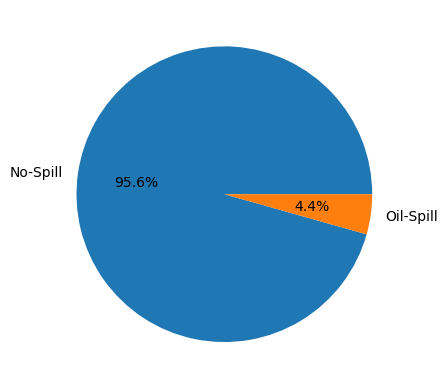

In [220]:
inter=df['target'].value_counts()
plt.pie(inter,labels=['No-Spill','Oil-Spill'],autopct='%0.1f%%',radius=1);

### Distribution of every column

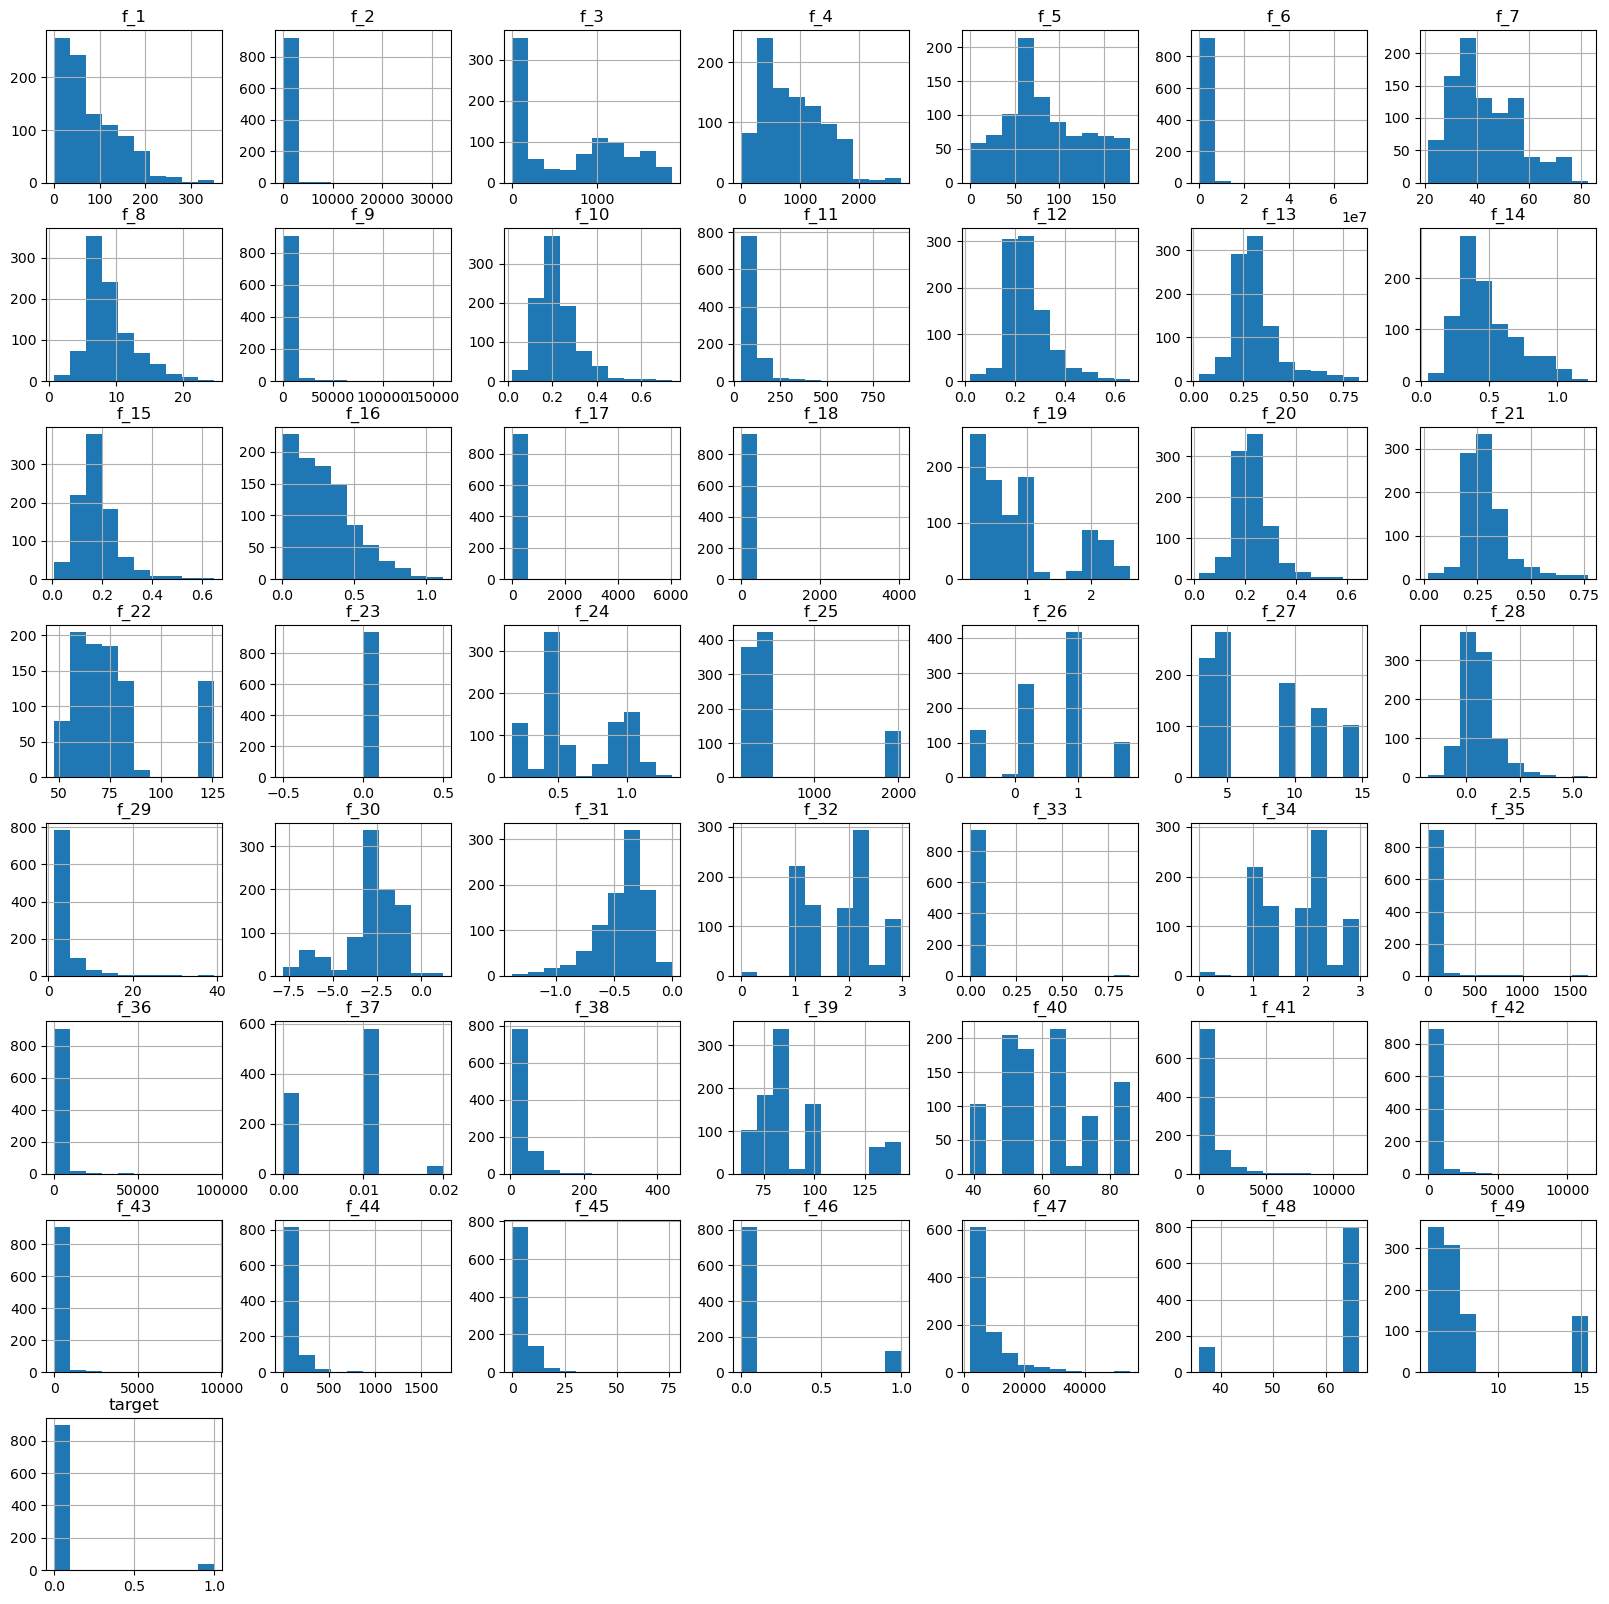

In [221]:
df.hist(figsize=(20,20))
plt.show()

#### Removing the data with high correlation

In [222]:
a = df.corr()

In [223]:
def correlation(dataset, threshold):
    col_corr = set()                                        # creating a object (set) as there is no repetition in set
    for i in range(len(dataset.columns)):
        for j in range (i):
            if (dataset.iloc[i,j]) > threshold:             #all the index having greater value than the threshold
                colname = dataset.columns[i]                #creating object colname cosidering the columns name having greater value than threshold
                col_corr.add(colname)                       # adding it to the set created
    return list(col_corr)


In [224]:
corr_features = correlation(a, 0.85)
print(corr_features)

['f_21', 'f_49', 'f_36', 'f_20', 'f_32', 'f_16', 'f_35', 'f_43', 'f_6', 'f_9', 'f_34', 'f_24', 'f_44', 'f_18', 'f_13', 'f_40', 'f_25']


In [225]:
df1 = df.drop(['f_21', 'f_49', 'f_36', 'f_20', 'f_32', 'f_16', 'f_35', 'f_43', 'f_6', 'f_9', 'f_34', 'f_24', 'f_44', 'f_18', 'f_13', 'f_40', 'f_25'] ,axis=1)

In [226]:
print(df1.shape)
df1.head(5)

(937, 33)


,f_1,f_2,f_3,f_4,f_5,f_7,f_8,f_10,f_11,f_12,...,f_37,f_38,f_39,f_41,f_42,f_45,f_46,f_47,f_48,target
0,1,2558,1506.09,456.63,90,40.88,7.89,0.19,214.7,0.21,...,0.00,138.68,89,2850.00,1000.00,3.73,0,33243.19,65.74,1
1,2,22325,79.11,841.03,180,51.11,1.21,0.02,901.7,0.02,...,0.00,68.65,89,5750.00,11500.00,0.60,0,51572.04,65.73,0
2,3,115,1449.85,608.43,88,40.42,7.34,0.18,86.1,0.21,...,0.01,38.80,89,1400.00,250.00,9.33,1,31692.84,65.81,1
3,4,1201,1562.53,295.65,66,42.40,7.97,0.19,166.5,0.21,...,0.00,108.27,89,6041.52,761.58,13.33,1,37696.21,65.67,1
4,5,312,950.27,440.86,37,41.43,7.03,0.17,232.8,0.15,...,0.00,14.39,89,1320.04,710.63,2.58,0,29038.17,65.66,0


#### Checking value count of each column

In [227]:
for column in df1.columns:
    print(df1[column].value_counts())
    print(("*"*20))

3      9
5      9
6      9
8      9
9      9
      ..
261    1
266    1
267    1
269    1
204    1
Name: f_1, Length: 238, dtype: int64
********************
10       43
12       36
11       33
15       24
13       23
         ..
22325     1
120       1
150       1
200       1
34        1
Name: f_2, Length: 297, dtype: int64
********************
112.12     2
22.00      2
7.70       2
118.31     2
26.50      2
          ..
1125.06    1
1121.80    1
1028.29    1
1111.92    1
7.73       1
Name: f_3, Length: 927, dtype: int64
********************
1054.81    2
644.00     2
1824.79    2
283.29     2
456.63     1
          ..
1027.94    1
1033.41    1
894.53     1
1185.32    1
235.73     1
Name: f_4, Length: 933, dtype: int64
********************
90     22
69     19
66     18
64     17
68     16
       ..
104     1
25      1
20      1
46      1
4       1
Name: f_5, Length: 179, dtype: int64
********************
37.33    3
38.90    3
54.50    3
55.00    3
38.57    3
        ..
40.44    1
42.27 

In [228]:
df1['f_23'].value_counts() #column contain single value

0    937
Name: f_23, dtype: int64

In [229]:
df1.drop(['f_23'], axis=1, inplace=True) #droping column as it contain single value


In [230]:
df1.shape #shape of final dataset

(937, 32)

## Compute x(independent features) and y(dependent features)

In [231]:
x=df1.drop('target',axis=1)
y=df1['target']
print(x.shape)
print(y.shape)
print(type(x))
print(type(y))

(937, 31)
(937,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


#### Scaling

In [232]:
from sklearn.preprocessing import MinMaxScaler
mmsc = MinMaxScaler()

In [233]:
x_scaled = mmsc.fit_transform(x)

#### Split data into train and test

In [234]:
from sklearn.model_selection import train_test_split

In [235]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=20)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

(655, 31)
(655,)
(282, 31)
(282,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


### Create function tfor model evaluation

In [236]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [237]:
def eval_model(y_test,ypred):
    print('Confusion Matrix:\n', confusion_matrix(y_test,ypred))
    print('Classification Report:\n', classification_report(y_test,ypred))
    print('Accuracy Score:', accuracy_score(y_test,ypred))

def mscore(model):
    print('Training Score =', model.score(x_train,y_train))
    print('Testing Score =', model.score(x_test,y_test))
    

## Logistic Regression

In [238]:
from sklearn.linear_model import LogisticRegression

In [239]:
lr = LogisticRegression(max_iter=1000 ,solver='liblinear',)

#### Training, Predicting and Evaluating data

In [240]:
lr.fit(x_train,y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [241]:
ypred_lr = lr.predict(x_test)
ypred_lr

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [242]:
mscore(lr)

Training Score = 0.9755725190839695
Testing Score = 0.9574468085106383


In [243]:
eval_model(y_test,ypred_lr)

Confusion Matrix:
 [[263   2]
 [ 10   7]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       265
           1       0.78      0.41      0.54        17

    accuracy                           0.96       282
   macro avg       0.87      0.70      0.76       282
weighted avg       0.95      0.96      0.95       282

Accuracy Score: 0.9574468085106383


## Decision Tree Classifier

In [244]:
from sklearn.tree import DecisionTreeClassifier

In [245]:
dtc = DecisionTreeClassifier(criterion='gini',max_depth=20,min_samples_split=15)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=20, min_samples_split=15)

In [246]:
ypred_dtc = dtc.predict(x_test)
ypred_dtc

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [247]:
mscore(dtc)

Training Score = 0.983206106870229
Testing Score = 0.9539007092198581


In [248]:
eval_model(y_test,ypred_dtc)

Confusion Matrix:
 [[262   3]
 [ 10   7]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       265
           1       0.70      0.41      0.52        17

    accuracy                           0.95       282
   macro avg       0.83      0.70      0.75       282
weighted avg       0.95      0.95      0.95       282

Accuracy Score: 0.9539007092198581


#### Plotting the Tree

In [249]:
from sklearn.tree import plot_tree

In [250]:
cn = ['0','1']
fn = x.columns
print(cn)
print(fn)

['0', '1']
Index(['f_1', 'f_2', 'f_3', 'f_4', 'f_5', 'f_7', 'f_8', 'f_10', 'f_11', 'f_12',
       'f_14', 'f_15', 'f_17', 'f_19', 'f_22', 'f_26', 'f_27', 'f_28', 'f_29',
       'f_30', 'f_31', 'f_33', 'f_37', 'f_38', 'f_39', 'f_41', 'f_42', 'f_45',
       'f_46', 'f_47', 'f_48'],
      dtype='object')


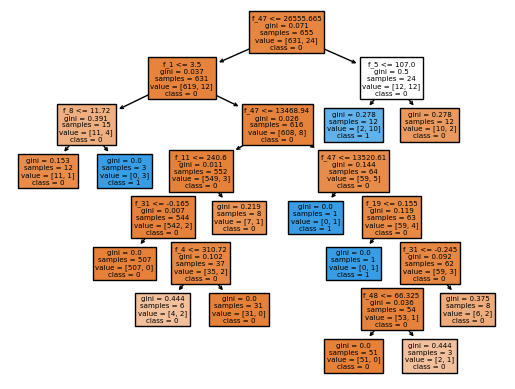

In [251]:
plot_tree(dtc,class_names=cn,feature_names=fn,filled=True)
plt.show()

## Random Forest

In [252]:
from sklearn.ensemble import RandomForestClassifier

In [253]:
rf = RandomForestClassifier(n_estimators=50,criterion='gini',min_samples_split=20,max_depth=15)
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=15, min_samples_split=20, n_estimators=50)

In [254]:
ypred_rf = rf.predict(x_test)
ypred_rf

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [255]:
mscore(rf)

Training Score = 0.9709923664122138
Testing Score = 0.9397163120567376


In [256]:
eval_model(y_test,ypred_rf)

Confusion Matrix:
 [[264   1]
 [ 16   1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       265
           1       0.50      0.06      0.11        17

    accuracy                           0.94       282
   macro avg       0.72      0.53      0.54       282
weighted avg       0.92      0.94      0.92       282

Accuracy Score: 0.9397163120567376


### Bagging Classifier on Decision Tree

In [257]:
from sklearn.ensemble import BaggingClassifier

In [258]:
dtree = DecisionTreeClassifier(criterion='gini',min_samples_split=20,max_depth=10)
bg_dt = BaggingClassifier(base_estimator=dtree, n_estimators=15)

In [259]:
bg_dt.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=10,
                                                        min_samples_split=20),
                  n_estimators=15)

In [260]:
mscore(bg_dt)

Training Score = 0.9755725190839695
Testing Score = 0.9468085106382979


In [261]:
ypred_bgdt = bg_dt.predict(x_test)
ypred_bgdt

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [262]:
eval_model(y_test,ypred_bgdt)

Confusion Matrix:
 [[262   3]
 [ 12   5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       265
           1       0.62      0.29      0.40        17

    accuracy                           0.95       282
   macro avg       0.79      0.64      0.69       282
weighted avg       0.94      0.95      0.94       282

Accuracy Score: 0.9468085106382979


## Adaboost Classifier on Decision Tree

In [263]:
from sklearn.ensemble import AdaBoostClassifier

In [264]:
dtree_1 = DecisionTreeClassifier(criterion="entropy",min_samples_split=15,max_depth=10)
adbc = AdaBoostClassifier(base_estimator=dtree_1,n_estimators=30)

In [265]:
adbc.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=10,
                                                         min_samples_split=15),
                   n_estimators=30)

In [266]:
ypred_adbc = adbc.predict(x_test)
ypred_adbc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [267]:
mscore(adbc)

Training Score = 1.0
Testing Score = 0.9432624113475178


In [268]:
eval_model(y_test,ypred_adbc)

Confusion Matrix:
 [[263   2]
 [ 14   3]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       265
           1       0.60      0.18      0.27        17

    accuracy                           0.94       282
   macro avg       0.77      0.58      0.62       282
weighted avg       0.93      0.94      0.93       282

Accuracy Score: 0.9432624113475178


#### Looking for best ML Model

In [270]:
performance = {'Logistic Regression' : accuracy_score(y_test,ypred_lr),
                  'Decision Tree' : accuracy_score(y_test,ypred_dtc),
                  'Random Forest' : accuracy_score(y_test,ypred_rf),
                  'Bagging' : accuracy_score(y_test,ypred_bgdt),
                  'Adaboost' : accuracy_score(y_test,ypred_adbc)}


result = pd.DataFrame(performance,index=['Accuracy'])
result.T    #transpose

,Accuracy
Logistic Regression,0.957447
Decision Tree,0.953901
Random Forest,0.939716
Bagging,0.946809
Adaboost,0.943262


### Getting Logistic Regression as the best Model

#### Saving the Best Model

In [272]:
# import pickle library
import pickle

In [275]:
pickle.dump(lr, open('Logistic_Regression.pkl','wb')) 

#### Choosing 20 random data point

In [276]:
df1.head() #Random data set

,f_1,f_2,f_3,f_4,f_5,f_7,f_8,f_10,f_11,f_12,...,f_37,f_38,f_39,f_41,f_42,f_45,f_46,f_47,f_48,target
0,1,2558,1506.09,456.63,90,40.88,7.89,0.19,214.7,0.21,...,0.00,138.68,89,2850.00,1000.00,3.73,0,33243.19,65.74,1
1,2,22325,79.11,841.03,180,51.11,1.21,0.02,901.7,0.02,...,0.00,68.65,89,5750.00,11500.00,0.60,0,51572.04,65.73,0
2,3,115,1449.85,608.43,88,40.42,7.34,0.18,86.1,0.21,...,0.01,38.80,89,1400.00,250.00,9.33,1,31692.84,65.81,1
3,4,1201,1562.53,295.65,66,42.40,7.97,0.19,166.5,0.21,...,0.00,108.27,89,6041.52,761.58,13.33,1,37696.21,65.67,1
4,5,312,950.27,440.86,37,41.43,7.03,0.17,232.8,0.15,...,0.00,14.39,89,1320.04,710.63,2.58,0,29038.17,65.66,0


In [281]:
#Random_data = df1.sample(20) # commenting out this as sample data changes when executed
print(Random_data.shape)
Random_data.head()

(20, 32)


,f_1,f_2,f_3,f_4,f_5,f_7,f_8,f_10,f_11,f_12,...,f_37,f_38,f_39,f_41,f_42,f_45,f_46,f_47,f_48,target
162,153,65,1010.06,1416.57,85,37.26,8.69,0.23,68.3,0.18,...,0.01,34.86,78,855.86,200.00,7.46,0,7159.62,66.17,0
402,135,51,1030.63,992.47,53,37.31,7.82,0.21,73.7,0.21,...,0.01,23.47,85,570.09,360.56,3.35,0,2874.53,65.93,0
324,34,60,879.47,897.85,61,38.45,8.36,0.22,104.9,0.22,...,0.00,13.63,85,559.02,360.56,2.90,0,3522.31,65.87,0
80,70,256,1601.62,1483.52,174,34.87,7.42,0.21,90.8,0.25,...,0.01,77.66,78,1303.84,1104.54,2.45,0,3949.53,66.28,0
71,61,55,1485.98,1192.35,9,32.98,5.21,0.16,89.3,0.19,...,0.01,17.25,78,707.11,200.00,5.35,0,4783.57,66.12,0


In [282]:
Random_data.reset_index()

,index,f_1,f_2,f_3,f_4,f_5,f_7,f_8,f_10,f_11,...,f_37,f_38,f_39,f_41,f_42,f_45,f_46,f_47,f_48,target
0,162,153,65,1010.06,1416.57,85,37.26,8.69,0.23,68.3,...,0.01,34.86,78,855.86,200.00,7.46,0,7159.62,66.17,0
1,402,135,51,1030.63,992.47,53,37.31,7.82,0.21,73.7,...,0.01,23.47,85,570.09,360.56,3.35,0,2874.53,65.93,0
2,324,34,60,879.47,897.85,61,38.45,8.36,0.22,104.9,...,0.00,13.63,85,559.02,360.56,2.90,0,3522.31,65.87,0
3,80,70,256,1601.62,1483.52,174,34.87,7.42,0.21,90.8,...,0.01,77.66,78,1303.84,1104.54,2.45,0,3949.53,66.28,0
4,71,61,55,1485.98,1192.35,9,32.98,5.21,0.16,89.3,...,0.01,17.25,78,707.11,200.00,5.35,0,4783.57,66.12,0
5,316,23,99,1111.92,1027.94,86,42.69,5.27,0.12,115.7,...,0.00,18.50,85,756.64,300.00,3.03,0,4405.71,65.96,0
6,781,49,27,11.74,554.74,68,51.04,9.96,0.20,103.6,...,0.00,20.40,82,603.74,402.49,2.96,0,3772.43,66.07,0
7,41,31,350,1029.52,1365.38,87,41.09,8.33,0.20,182.3,...,0.00,26.33,78,1503.33,751.66,2.93,0,6013.52,66.14,0
8,443,11,173,239.32,1410.40,152,24.06,6.45,0.27,109.9,...,0.01,20.14,133,0.00,0.00,0.00,0,15072.37,36.17,0
9,715,68,16,11.38,533.94,151,73.38,14.88,0.20,128.2,...,0.00,7.89,102,402.49,201.25,3.04,0,3696.93,66.04,0


#### Saving Random 20 data point to CSV file

In [283]:
# Random_data.to_csv("Random_20_data.csv", index=False) 

# commenting out so that it doesnt run again and save file again.

#### Loading the Model

In [284]:
load_model = pickle.load(open('Logistic_Regression.pkl','rb'))    # rb = read binary
print(load_model)

LogisticRegression(max_iter=1000, solver='liblinear')


#### Model Testing on Sample Data

Importing Random_20_data as test_df and then will do all the necessary data_preprocessing

In [285]:
test_df = pd.read_csv('Random_20_data.csv')
print(test_df.shape)
test_df.head()

(20, 32)


,f_1,f_2,f_3,f_4,f_5,f_7,f_8,f_10,f_11,f_12,...,f_37,f_38,f_39,f_41,f_42,f_45,f_46,f_47,f_48,target
0,153,65,1010.06,1416.57,85,37.26,8.69,0.23,68.3,0.18,...,0.01,34.86,78,855.86,200.00,7.46,0,7159.62,66.17,0
1,135,51,1030.63,992.47,53,37.31,7.82,0.21,73.7,0.21,...,0.01,23.47,85,570.09,360.56,3.35,0,2874.53,65.93,0
2,34,60,879.47,897.85,61,38.45,8.36,0.22,104.9,0.22,...,0.00,13.63,85,559.02,360.56,2.90,0,3522.31,65.87,0
3,70,256,1601.62,1483.52,174,34.87,7.42,0.21,90.8,0.25,...,0.01,77.66,78,1303.84,1104.54,2.45,0,3949.53,66.28,0
4,61,55,1485.98,1192.35,9,32.98,5.21,0.16,89.3,0.19,...,0.01,17.25,78,707.11,200.00,5.35,0,4783.57,66.12,0


#### Create another object and remove Target from dataframe

In [287]:
test_df1 = test_df.drop('target',axis=1)
test_df1.shape

(20, 31)

In [288]:
test_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f_1     20 non-null     int64  
 1   f_2     20 non-null     int64  
 2   f_3     20 non-null     float64
 3   f_4     20 non-null     float64
 4   f_5     20 non-null     int64  
 5   f_7     20 non-null     float64
 6   f_8     20 non-null     float64
 7   f_10    20 non-null     float64
 8   f_11    20 non-null     float64
 9   f_12    20 non-null     float64
 10  f_14    20 non-null     float64
 11  f_15    20 non-null     float64
 12  f_17    20 non-null     float64
 13  f_19    20 non-null     float64
 14  f_22    20 non-null     float64
 15  f_26    20 non-null     float64
 16  f_27    20 non-null     float64
 17  f_28    20 non-null     float64
 18  f_29    20 non-null     float64
 19  f_30    20 non-null     float64
 20  f_31    20 non-null     float64
 21  f_33    20 non-null     float64
 22  f_37

#### Use the model to predict the Target variable and then we will compare

In [289]:
Prediction = load_model.predict(test_df1)
Prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

### Compare Actual and Predicted results

In [291]:
Compare = {'Actual' : test_df['target'],
                       'Prediction' : Prediction}

Result = pd.DataFrame(Compare)
Result

,Actual,Prediction
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


# Our Actual and Predicted results are same.